In [38]:
import pandas as pd #for data wrangling purpose 
import  numpy as np  #basic computation library
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt # ploting package
import warnings
warnings.filterwarnings("ignore")

In [39]:
##Importing flight prediction dataset excel file using pandas 
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [41]:
df.shape

(10683, 11)

In [42]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Feature engineering on date of journey columns**

In [43]:
##Extracting day froom  date of journey columns

df["journey_day"]=pd.to_datetime(df["Date_of_Journey"]).dt.day
df.head()

##Extracting month froom  date of journey columns
df["journey_month"]=pd.to_datetime(df["Date_of_Journey"]).dt.month
df.head()

#Dropping Date_of_journey columns
df.drop("Date_of_Journey",axis=1,inplace=True)


In [44]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


**Feature engineering on "Duration" columns**

In [45]:
#conversation of Duration column form hr & minutes format to minutes

df["Duration"]=df["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)


#convert this column into a numeric datatypes
df["Duration"]=df["Duration"].astype(int)

**Feature engineering on "Dep_Time" columns**

In [46]:
## Extracting hours form Dep_Time columns
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#### Extracting Minutes form Dep_Time columns
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

#### dropping  Dep_Time columns

df.drop("Dep_Time",axis=1,inplace=True)

In [47]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,445,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,325,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,285,1 stop,No info,13302,1,3,16,50


**Feature engineering on "Arrival_Time" columns**


In [48]:
## Extracting Arrival_hour Form Arrival_time Columns
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

## Extracting Arrival_hour Form Arrival_time Columns
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

#### dropping  Arrival_Time columns

df.drop("Arrival_Time",axis=1,inplace=True)

In [49]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


**Numerical  & Categorical**

In [50]:
Numerical =df.select_dtypes(exclude="object")
Categorical=df.select_dtypes(include="object")

In [54]:
for i in Categorical:
    print("Unique value counts of",i,"Enlisted as below Table:")
    print("-"*40)
    print(df[i].value_counts())
    print("Hello Nayab khan", "*"*120)

Unique value counts of Airline Enlisted as below Table:
----------------------------------------
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Hello Nayab khan ************************************************************************************************************************
Unique value counts of Source Enlisted as below Table:
----------------------------------------
Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
Hello Nayab k

In [56]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [57]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [58]:
####Replacing "New Delhi" as "Delhi" in destination Column
df["Destination"]=df["Destination"].replace("New Delhi","Delhi")

### in the column "Additional_info ","No Info" and "No Info" are same so replacing it by "No Info
df["Additional_Info"]=df["Additional_Info"].replace("No info","No Info")

In [59]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [60]:
df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,":"})

In [61]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
journey_day        0
journey_month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [62]:
df.dropna(inplace=True)

**Data Integrity check**)

In [63]:
### Since dataset is large, Let Check for any entry which is repeated or duplicated in dataset.
df.duplicated().sum() ##This will check the duplicate data for all columns.

np.int64(222)

**Around 222 duplicate data rows. it huge and we gonr drop them .there is no point on training model on duplicated data**

In [64]:
df.drop_duplicates(keep="last",inplace=True)

In [65]:
df.shape

(10460, 14)

**Let Check if any Whitespace,"NA"or"-" exist in dataset.**

In [66]:
df.isin([" ","NA","-","?"]).sum().any()

np.False_

**Exploring Features Source**

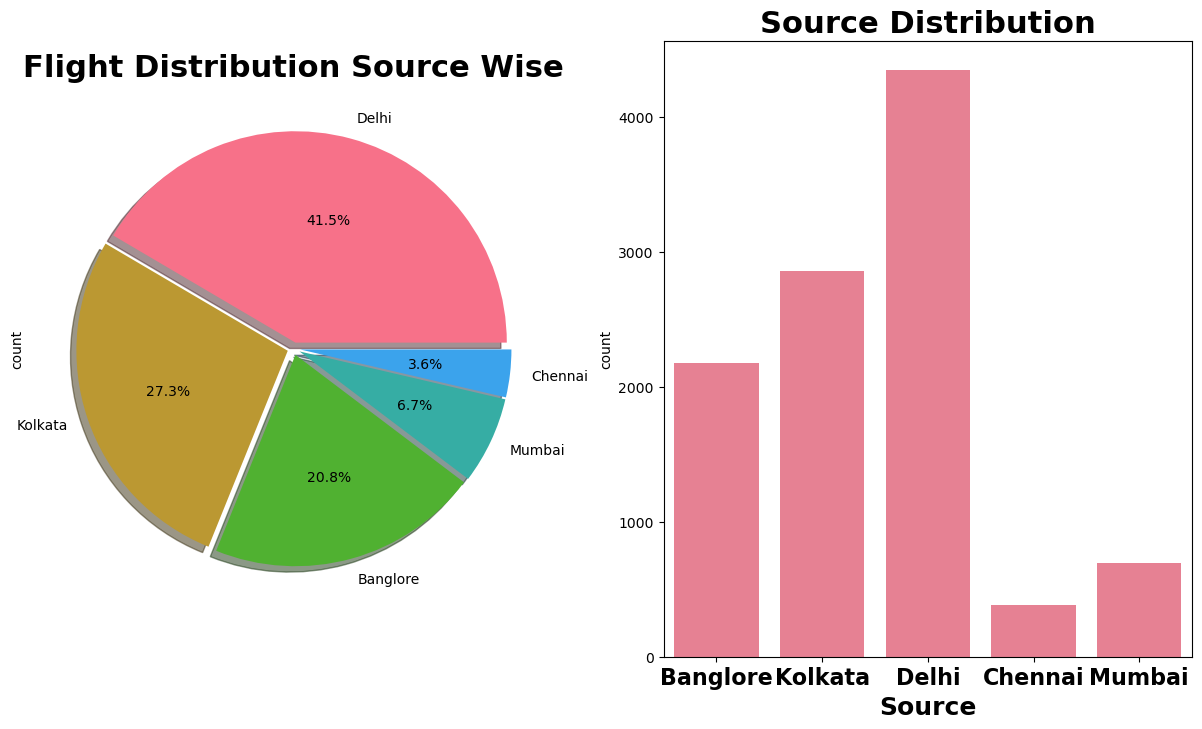

In [69]:
#plt.rcparams["figure.autoLayout"] = True

plt.figure(figsize=(15,8))
sns.set_palette('husl')
plt.subplot(1,2,1)
df['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                     shadow=True)
plt.title('Flight Distribution Source Wise', fontsize=22,fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(x='Source',data=df)
plt.title('Source Distribution',fontsize=22,fontweight='bold')
plt.xlabel('Source',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.show()

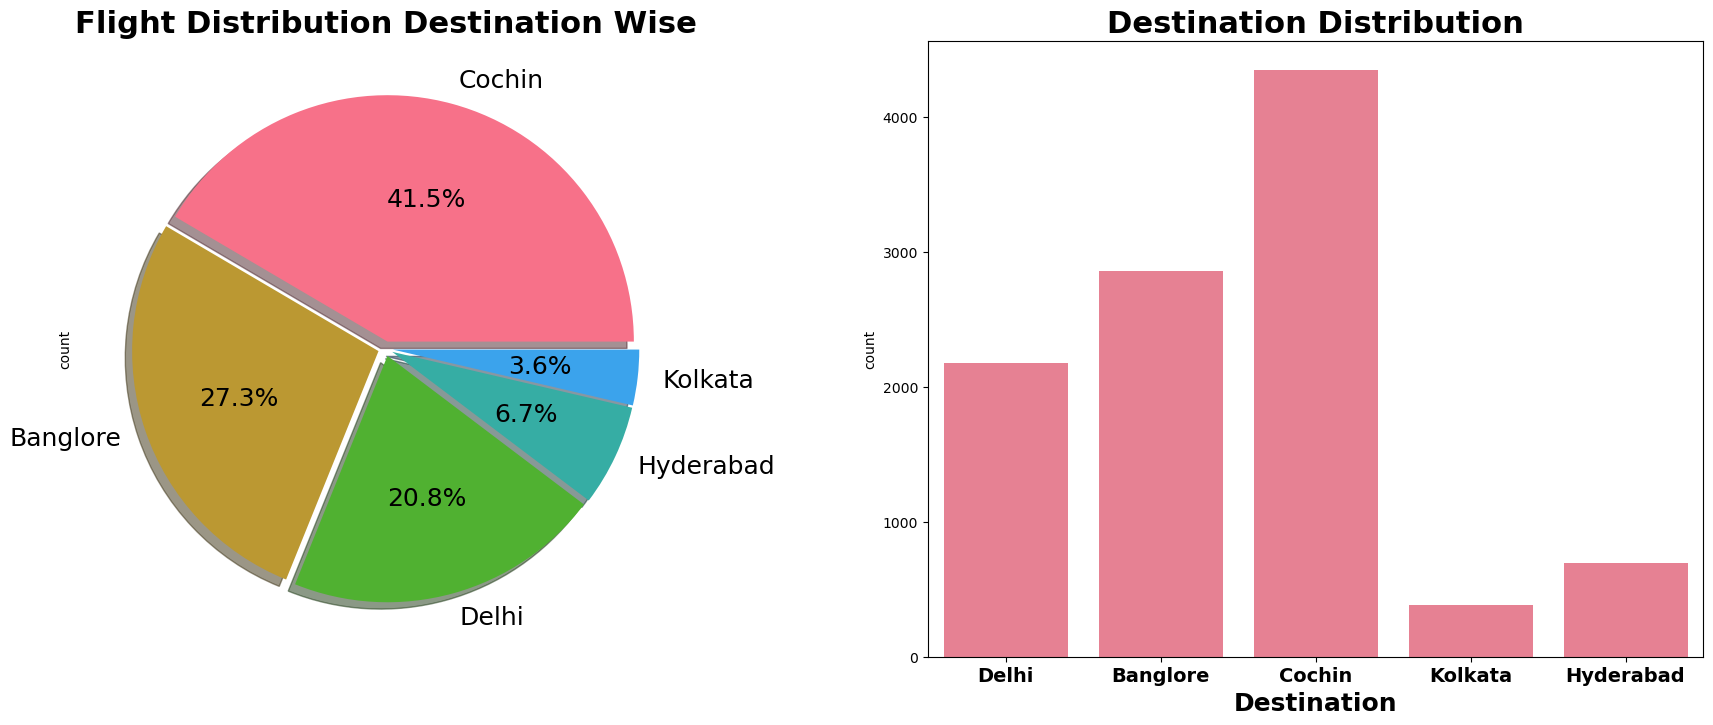

In [78]:
#plt.rcparams["figure.autoLayout"] = True

plt.figure(figsize=(22,8))
sns.set_palette('husl')
plt.subplot(1,2,1)
df['Destination'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops={"fontsize":"Bold","fontsize":18},
                                     shadow=True)
plt.title('Flight Distribution Destination Wise', fontsize=22,fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(x='Destination',data=df)
plt.title('Destination Distribution',fontsize=22,fontweight='bold')
plt.xlabel('Destination',fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.show()

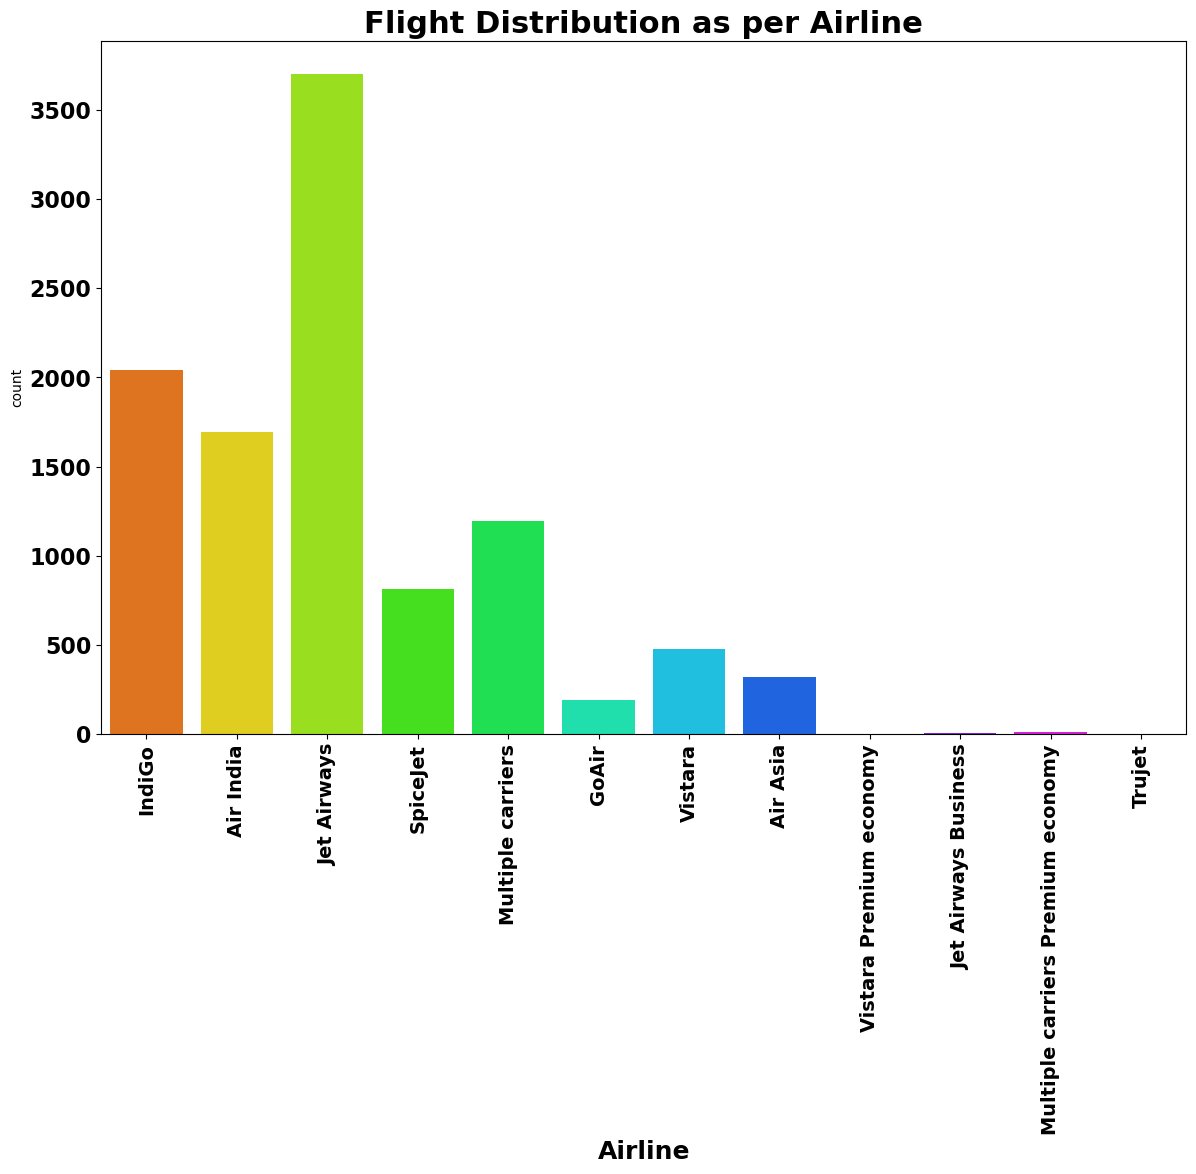

In [77]:
plt.figure(figsize=(14,9))
sns.countplot(x=df["Airline"],palette="hsv")
plt.title('Flight Distribution as per Airline',fontsize=22,fontweight='bold')
plt.xlabel('Airline',fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold',rotation=90)
plt.yticks(fontsize=16,fontweight='bold')
plt.show()

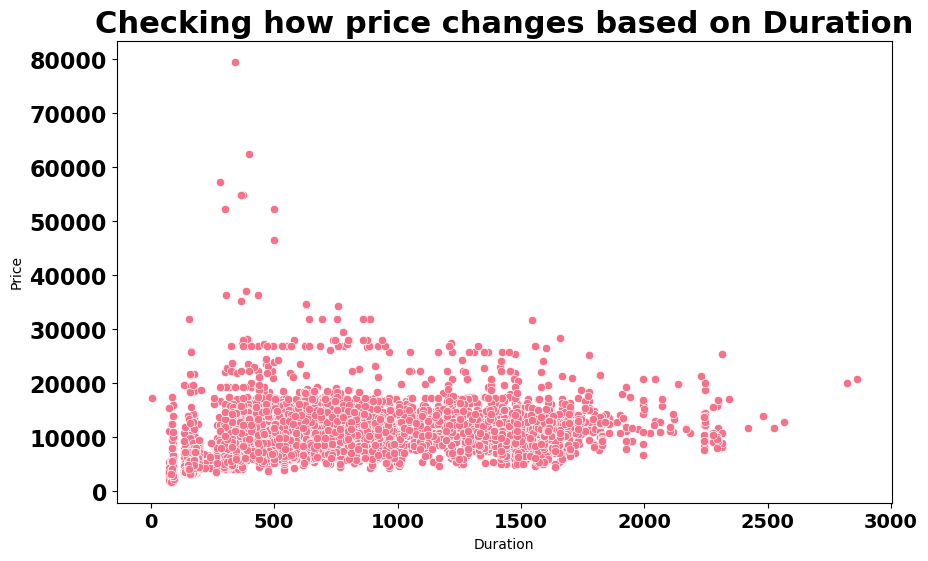

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Duration",y="Price")
plt.title('Checking how price changes based on Duration',fontsize=22,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.show()

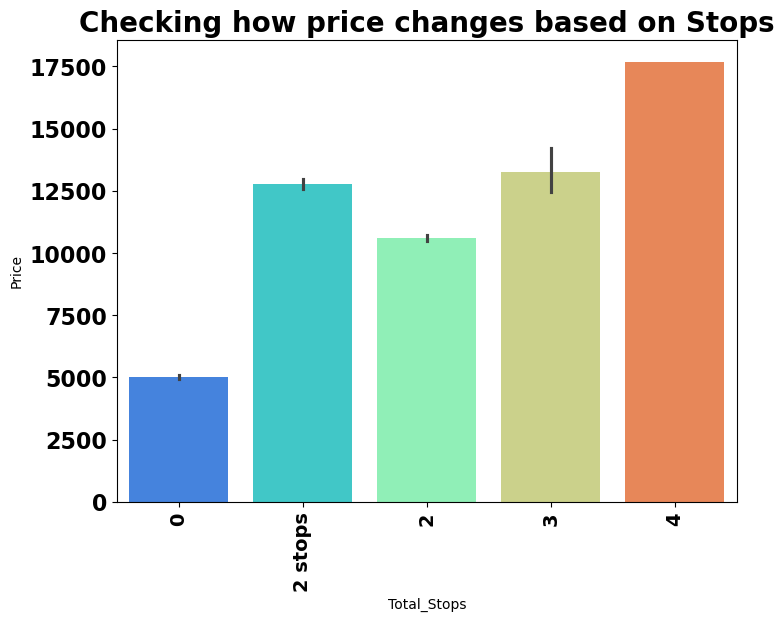

In [87]:
###
plt.figure(figsize=(8,6))
sns.barplot(x=df["Total_Stops"],y=df["Price"],data=df,palette="rainbow")
plt.title('Checking how price changes based on Stops',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold',rotation=90)
plt.yticks(fontsize=16,fontweight='bold')
plt.show()